In [1]:
import xarray as xr

In [2]:
data = xr.open_dataset("simulation_output.nc")

In [3]:
data

<xarray.Dataset> Size: 3MB
Dimensions:             (subpop: 581, date: 122, mc_infection_stage: 3)
Coordinates:
  * subpop              (subpop) object 5kB '11001' '11002' ... '93088' '93090'
  * date                (date) datetime64[ns] 976B 2024-01-01 ... 2024-05-01
  * mc_infection_stage  (mc_infection_stage) object 24B 'S' 'I' 'R'
Data variables:
    prevalence          (date, mc_infection_stage, subpop) float64 2MB ...
    incidence           (date, mc_infection_stage, subpop) float64 2MB ...
Attributes:
    description:  Dynamical simulation results
    run_id:       20240717_150412

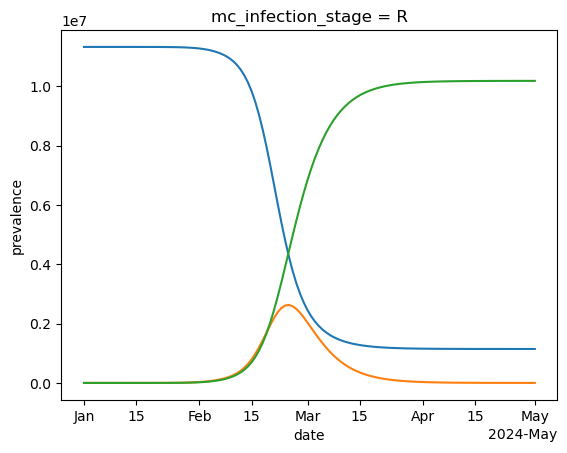

In [4]:
data.sel({'mc_infection_stage': 'S'}).sum(dim='subpop')['prevalence'].plot()
data.sel({'mc_infection_stage': 'I'}).sum(dim='subpop')['prevalence'].plot()
data.sel({'mc_infection_stage': 'R'}).sum(dim='subpop')['prevalence'].plot()